# **Multi Class Disease Detection Using CNN**

 
 ### Prepared By : Dr Abhi Khan
 ### Dated : 25 Apr 2024
 ### Contact : abhikhan2999@gmail.com


 ## About the Dataset
  * The Dataset contains 10 different types disease images collected from Kaggle
  * The Dataset is further categorized into normal malignant and benign Images
  * The Labels are made and the data is prepared for the CNN Model
  
## Data Normalization and Preprocessing 
  * The data is normalized, scaled and batched for the Model Training 
  
## The CNN Model 
  * Sequential CNN Model is created 
  * 32 Batch Size are selected
  * Training of the Model is saved
  * The Model is trained for 10 Epochs 
  * Dropout Layer is added for better performance and avoid the overfitting 
  * Early stopping is applied for timely stopping of the model once acheives the results
  * The Model is evaluated on the Accuracy metric, classification report and confusion metric 

# **Results** 

### We have **acheived and accuracy score of 83%** Which can be increased by data augmentation or data increasing or increasing the epochs as well as checking different learning Rates.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.preprocessing import image

In [2]:
# Now as we have to predict the 10 different diseases from given pictures in cancer_images dataset
#print all the diseases folders and save as list 
diseases = os.listdir('cancer_images')
print(diseases)

['breast_benign', 'breast_malignant', 'breast_normal', 'lung_benign', 'lung_malignant', 'lung_normal', 'skin_benign', 'skin_malignant', 'tumer_no', 'tumer_yes']


In [3]:
len(diseases)

10

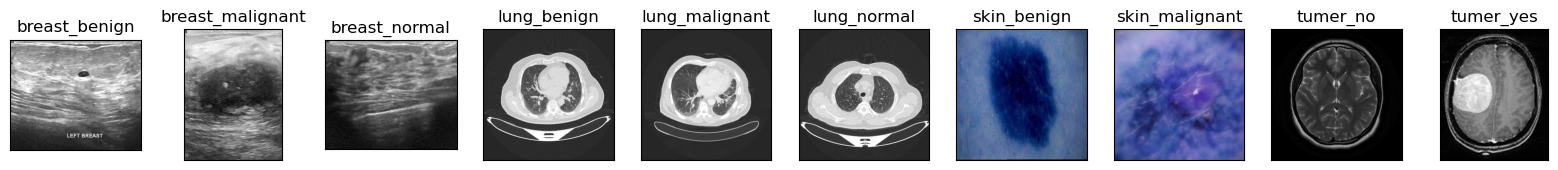

In [4]:
#Now print all the diseases with labels and its pictures in one image
plt.figure(figsize=(20, 20))
for i, disease in enumerate(diseases):
    for j in range(1):
        img = cv2.imread('cancer_images/'+disease+'/'+os.listdir('cancer_images/'+disease)[j])
        plt.subplot(10, 10, i+1)
        plt.imshow(img)
        plt.title(disease)
        plt.xticks([])
        plt.yticks([])

In [5]:
# As we have to predict the diseases using CNN 
# Now we will create the training and testing dataset
# We will create the training and testing dataset
X = []
y = []
for i, disease in enumerate(diseases):
    for img in os.listdir('cancer_images/'+disease):
        img = cv2.imread('cancer_images/'+disease+'/'+img)
        img = cv2.resize(img, (64, 64))
        X.append(img)
        y.append(disease)
X = np.array(X)
y = np.array(y)

In [6]:
#Lets preprocess the data
X = X/255
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = np_utils.to_categorical(y)

In [7]:
#Now we will split the data into training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

# Initialize the Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add Fully Connected layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Compile the model with hypertuned parameters
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001, verbose=1)
# Train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping, reduce_lr])
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
51/51 [==============================] - 8s 124ms/step - loss: 1.2914 - accuracy: 0.5040 - val_loss: 0.9368 - val_accuracy: 0.6040 - lr: 0.0010
Epoch 2/10
51/51 [==============================] - 6s 112ms/step - loss: 0.7802 - accuracy: 0.6634 - val_loss: 0.7020 - val_accuracy: 0.7550 - lr: 0.0010
Epoch 3/10
51/51 [==============================] - 6s 120ms/step - loss: 0.5437 - accuracy: 0.7743 - val_loss: 0.5748 - val_accuracy: 0.7772 - lr: 0.0010
Epoch 4/10
51/51 [==============================] - 6s 125ms/step - loss: 0.3878 - accuracy: 0.8506 - val_loss: 0.4947 - val_accuracy: 0.8045 - lr: 0.0010
Epoch 5/10
51/51 [==============================] - 6s 112ms/step - loss: 0.3162 - accuracy: 0.8760 - val_loss: 0.4682 - val_accuracy: 0.8243 - lr: 0.0010
Epoch 6/10
51/51 [==============================] - 6s 114ms/step - loss: 0.2220 - accuracy: 0.9175 - val_loss: 0.4894 - val_accuracy: 0.8267 - lr: 0.0010
Epoch 7/10
51/51 [==============================] - 6s 113ms/step - lo

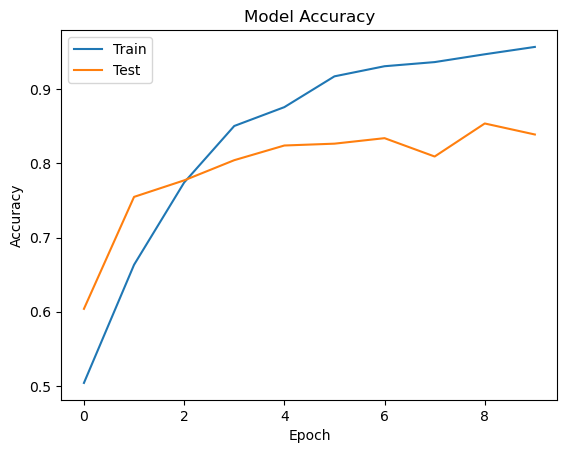

In [10]:
#print the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [11]:
#Lets see the other evaluation metrics 

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))


13/13 [==============================] - 1s 47ms/step
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        77
           1       0.73      0.61      0.67        44
           2       0.70      0.73      0.71        22
           3       0.83      1.00      0.91        15
           4       1.00      0.98      0.99        53
           5       1.00      0.91      0.95        23
           6       0.84      1.00      0.91        86
           7       1.00      0.56      0.72        39
           8       0.74      0.95      0.83        21
           9       0.86      0.79      0.83        24

    accuracy                           0.84       404
   macro avg       0.85      0.83      0.83       404
weighted avg       0.85      0.84      0.83       404



In [12]:
#Lets save the model 
model.save('cancer_diseases_hypertune_large_dataset.h5')

In [13]:
#load the model 
model = load_model('cancer_diseases_hypertune_large_dataset.h5')

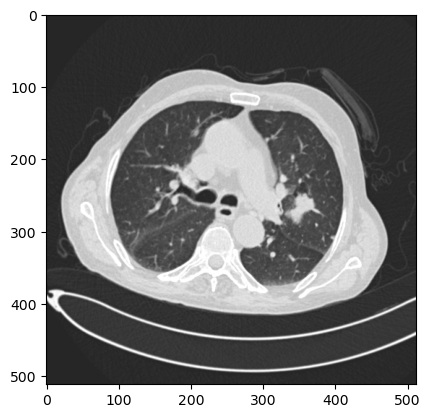

In [16]:
#Now lets predict the image using cv2
img_path = r'C:\Users\s\Desktop\cancer_disease_large_data\cancer_images\lung_malignant\Malignant case (2).jpg'

#read image
img = cv2.imread(img_path)

#show image 
plt.imshow(img)

In [17]:
#Now lets preprocess the img 
img = cv2.resize(img, (64, 64))
img = np.reshape(img, [1, 64, 64, 3])
img = img/255

In [18]:
#now lets predict the img
result = model.predict(img)
result = np.argmax(result)
print(label_encoder.inverse_transform([result]))

1/1 [==============================] - 0s 459ms/step
['lung_malignant']


# End of The Notebook